<a href="https://colab.research.google.com/github/datasensum-fabio/Coursera_Capstone/blob/master/ITALY_INCOME_ESTIMATOR_FOURSQUARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> CAN WE GUESS THE AVERAGE INCOME OF AN ITALIAN CITY WITH FOURSQUARE DATA?</h1>


---

> Introduction


<h5>In this project we are going to verify if it possible to accurately estimate the average income of an area by analyzing FOURSQUARE Venues and other pubblically available Geocoding Data (Latitude, Longitude, Altitude)</h5>

For business or a no-profit organization can be useful to estimate the average income of a certain town or area. For Instance, It could be helpful for a no-Profit organization that has to decide where to hold a Fundraising event or for a restaurant owner to decide where to open a new venue.

The target Variable for this problem will be the "AVERAGE INCOME PER-CAPITA OF THE AREA", so it is a regression problem

The Project will focus on Italy so the target variable of the project will be the "Average Taxable Income of the Town" registered by the ISTAT

however, the same methodolgy can be applied also to other countries

In [189]:
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Imported data from csv file:
- df_pop --> List all towns in Italy by population
- df_Reddito --> List all towns in Italy by Taxable Income
- df_denominazione --> List all towns in Italy by Region and Counties (Provincie)
-df_altitude --> List all towns in Italy by Average Altitude for sea level

**Source: ISTAT (Italian Government Census Data Collection Agency) : https://www.istat.it/en/**


In [6]:
#df with population per town
df_pop = pd.read_csv('https://raw.githubusercontent.com/datasensum-fabio/Coursera_Capstone/master/data/DCIS_POPRES1_08122020222714558.csv')

#df with Taxable income per town
df_Reddito = pd.read_csv('https://raw.githubusercontent.com/datasensum-fabio/Coursera_Capstone/master/data/MEF_REDDITIIRPEF_COM_07122020071748864.csv')

#df with Region and Province per town
df_denominazione= pd.read_csv('https://raw.githubusercontent.com/datasensum-fabio/Coursera_Capstone/master/data/Codici-statistici-e-denominazioni-al-01_07_2020.csv',encoding = "ISO-8859-1",sep=';')
df_denominazione = df_denominazione[['Denominazione (Italiana e straniera)','Codice Comune formato alfanumerico','Sigla automobilistica','Denominazione Regione']]

#df with Altitude per each town
df_altitude = pd.read_csv('https://raw.githubusercontent.com/datasensum-fabio/Coursera_Capstone/master/data/Elab_Altimetrie_DEM.csv',encoding = "ISO-8859-1",sep=';')
df_altitude = df_altitude[['NOME','MEDIA','STD','PRO_COM']]

# selecting only Taxable Income column
df_Reddito = df_Reddito[df_Reddito.TIPO_DATO_MEF=='TAXABINCR']
df_Reddito = df_Reddito[['Territorio','Value']]

df_pop= df_pop[['Territorio','Value']][1:]#.Territorio.value_counts().head(20)

#selecting towns with more than 10.000 people
df_pop = df_pop[df_pop.Value>10000]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#DATA CLEANING

In [7]:
#checking if there are town with same name
len(df_pop.value_counts()) == len(df_pop)


True

In [8]:
#mergind Income and Population tables
df = pd.merge(df_pop,df_Reddito,how='inner',on='Territorio')
df.columns = ['Town','Population','Taxable Income']
#Calculating TARGET VAIABLE
df['Taxable_Income_Pro_capite'] = df['Taxable Income']/df['Population']
df.sort_values('Taxable_Income_Pro_capite',ascending=False)

#Merging Regione and Province per town
df = pd.merge(df,df_denominazione,how='left',left_on='Town',right_on='Denominazione (Italiana e straniera)')
#Checking if merge working ok
df['Denominazione (Italiana e straniera)'].isnull().sum()

0

In [9]:
df.drop('Denominazione (Italiana e straniera)',inplace=True,axis=1)


In [10]:
cols = list(df.columns)
cols[-2] = 'Prov'
cols[-1] = 'Regione'
df.columns = cols
df.head()

Town  Population  ...  Prov   Regione
0    Torino      870952  ...    TO  Piemonte
1  Vercelli       46558  ...    VC  Piemonte
2    Verona      259608  ...    VR    Veneto
3   Vicenza      111764  ...    VI    Veneto
4   Belluno       35872  ...    BL    Veneto

[5 rows x 7 columns]

In [11]:
#merging with df_altitude
df = pd.merge(df,df_altitude,how='left',left_on='Codice Comune formato alfanumerico',right_on='PRO_COM').drop(['NOME','PRO_COM','Codice Comune formato alfanumerico'],axis=1)
df.head()

Town  Population  Taxable Income  ...   Regione     MEDIA       STD
0    Torino      870952    1.498548e+10  ...  Piemonte  266,4043  70,81829
1  Vercelli       46558    7.421240e+08  ...  Piemonte  128,3015  6,791454
2    Verona      259608    4.653083e+09  ...    Veneto  131,6091  124,5421
3   Vicenza      111764    1.920181e+09  ...    Veneto  39,25313  14,27084
4   Belluno       35872    6.657425e+08  ...    Veneto  781,9634  440,4044

[5 rows x 8 columns]

In [12]:
cols = list(df.columns)
cols[-2] = 'AVG_Altitude'
cols[-1] = 'STD_Altitude'
df.columns = cols
df.head()

Town  Population  Taxable Income  ...   Regione AVG_Altitude STD_Altitude
0    Torino      870952    1.498548e+10  ...  Piemonte     266,4043     70,81829
1  Vercelli       46558    7.421240e+08  ...  Piemonte     128,3015     6,791454
2    Verona      259608    4.653083e+09  ...    Veneto     131,6091     124,5421
3   Vicenza      111764    1.920181e+09  ...    Veneto     39,25313     14,27084
4   Belluno       35872    6.657425e+08  ...    Veneto     781,9634     440,4044

[5 rows x 8 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Town                       1213 non-null   object 
 1   Population                 1213 non-null   int64  
 2   Taxable Income             1213 non-null   float64
 3   Taxable_Income_Pro_capite  1213 non-null   float64
 4   Prov                       1150 non-null   object 
 5   Regione                    1213 non-null   object 
 6   AVG_Altitude               1205 non-null   object 
 7   STD_Altitude               1205 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 85.3+ KB


In [14]:
#Naples code is 'NA' and is was read as a NaN value during the upload
df.Prov.fillna('NA',inplace=True)

In [31]:
#values of Altirude are read as str because the contain a ',' in stead of a '.' as separator for decimal
#fillna with dummy variable
df['AVG_Altitude'].fillna(-10000, inplace=True)
df['STD_Altitude'].fillna(-10000, inplace=True)

df['AVG_Altitude'] = df.apply(lambda x: int(str(x['AVG_Altitude']).split(',')[0]),axis=1)
df['STD_Altitude'] = df.apply(lambda x: int(str(x['STD_Altitude']).split(',')[0]),axis=1)

In [32]:
# changing empty values of Altitude with average of the Province

for x in df[df.AVG_Altitude<-9999].index:
  Prov = df.loc[x]['Prov']
  df.at[x,'AVG_Altitude'] = df[df.Prov==Prov]['AVG_Altitude'].mean()
  df.at[x,'STD_Altitude'] = df[df.Prov==Prov]['STD_Altitude'].mean()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Town                       1213 non-null   object 
 1   Population                 1213 non-null   int64  
 2   Taxable Income             1213 non-null   float64
 3   Taxable_Income_Pro_capite  1213 non-null   float64
 4   Prov                       1213 non-null   object 
 5   Regione                    1213 non-null   object 
 6   AVG_Altitude               1213 non-null   int64  
 7   STD_Altitude               1213 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 125.3+ KB


#API to get Latitude and Longitude for all cities
## **LOCATION IQ**

In [36]:
#create nex col with Lat and Lng with dummy variables
df['Lat'] = 999.0 #assign arbitrary high number
df['Long'] = 999.0 #assign arbitrary high number
df.index = df.Town




In [46]:
token = 'pk.39e************************'
latitude=[]
longitude=[]

townsError =[] #variable to print le loop progress
i =0 #variable to print le loop progress
countlat =0 #variable to print le loop progress

#loop to avoid API issues (many time it doesn't work at first call)

while len(df[(df['Lat']>=998)|(df['Long']>=998)].Town)>=1:
  #print('Cities mapped {}'.format(len(df[~(df['Lat']>=998)|(df['Long']>=998)].Town)))

#loop to retrieve Lat e Long to all towns where the value is wrong
  for x in df[(df['Lat']>=998)|(df['Long']>=998)].Town:

    lat=0
    lon=0

    query = x +', '+ df.loc[x]['Prov'] + ', '+df.loc[x]['Regione'] +', Italy'
    url = 'https://us1.locationiq.com/v1/search.php?key={}&q={}&limit=1&countrycodes=IT&format=json'.format(token,query)
    results = requests.get(url).json()

    try:
      lat = results[0]['lat']
      df.at[x,'Lat'] = lat

    except:
      if i==10:
        print('Total Towns mapped: ' + str(len(df[df['Lat']<998])))

    try:
      lon = results[0]['lon']
      df.at[x,'Long'] = lon

    except:
      townsError.append(x)
      i=i+1
      if i==10:
        print('error: '+ str(townsError))
        i=0
        print('Total Towns mapped: ' + str(len(df[(df['Lat']<998)&(df['Long']<998)])))
        townsError=[]
  

error: ['Lucca', 'Arezzo', 'Siena', 'Grosseto', 'Viterbo', 'Latina', "L'Aquila", 'Teramo', 'Salerno', 'Trani']
Total Towns mapped: 203
error: ['Matera', 'Alpignano', "Anzola dell'Emilia", 'Appiano sulla strada del vino/Eppan an der Weinstraße', 'Aprilia', 'Arcisate', 'Avezzano', 'Bacoli', 'Cuneo', 'Biella']
Total Towns mapped: 207
error: ['Verbania', 'Como', 'Sondrio', 'Lecco', 'Lodi', 'Brindisi', 'Potenza', 'Trapani', 'Palermo', 'Messina']
Total Towns mapped: 211
error: ['Sassari', 'Nuoro', 'Cagliari', 'Acerra', 'Aci Castello', 'Acqui Terme', 'Adrano', 'Adria', 'Agrate Brianza', 'Agropoli']
Total Towns mapped: 215
error: ['Alberobello', 'Albignasego', 'Albino', 'Altofonte', 'Ariano Irpino', 'Arona', 'Assemini', 'Assisi', 'Atessa', 'Atri']
Total Towns mapped: 219
error: ['Bagno a Ripoli', 'Bareggio', 'Baronissi', 'Battipaglia', 'Bertinoro', 'Besana in Brianza', 'Bitetto', 'Bitonto', 'Bitritto', 'Bollate']
Total Towns mapped: 223
error: ['Bomporto', 'Borgomanero', 'Borgosesia', 'Boscore

In [47]:
#checking if there are Towns with wrong lat or lng data
df[(df['Lat']>=46.7)|(df['Long']>=18.3)|(df['Lat']<=36.8)|(df['Long']<=7.4)]






Town  Population  ...        Lat       Long
Town                                              ...                      
Avigliana                  Avigliana       12599  ...  45.077145   7.398616
Aosta                          Aosta       34052  ...  45.737088   7.319665
Brunico/Bruneck      Brunico/Bruneck       16774  ...  46.794706  11.929792
Bressanone/Brixen  Bressanone/Brixen       22572  ...  46.703591  11.647639
Giaveno                      Giaveno       16425  ...  45.042005   7.351994
Ispica                        Ispica       16334  ...  36.785832  14.907637
Melendugno                Melendugno       10001  ...  40.271701  18.336911
Pachino                      Pachino       22312  ...  36.715209  15.091477
Pinerolo                    Pinerolo       36178  ...  44.887309   7.331945
Pozzallo                    Pozzallo       19351  ...  36.726330  14.846343
Scicli                        Scicli       26837  ...  36.793570  14.706964
Tricase                      Tricase       17340  ...  39.930420  18.355332

[12 rows x 10 columns]

#FEATURES ENGINEERING  

##POPULATION in 15km *Raduis*

In [48]:
#population in a radius 0.13degree (15km)

def calc_pop_radius(Lat_Long,radisKM):

  lat = Lat_Long[0]
  lng = Lat_Long[1]
  radio = radisKM/111 #1 degree of lat is equal to 111km

  result = df[((df['Lat']>lat-radio)&(df['Lat']<lat+radio))&
    ((df['Long']>lng-radio)&(df['Long']<lng+radio))]['Population'].sum()
  return result

calc_pop_radius([38,15],15)

df['Pop_rad_15km'] = df.apply(lambda x: calc_pop_radius(x[['Lat','Long']],15),axis=1)

df.head()

Town  Population  ...       Long  Pop_rad_15km
Town                            ...                         
Torino      Torino      870952  ...   7.682489       1274810
Vercelli  Vercelli       46558  ...   8.422767         46558
Verona      Verona      259608  ...  10.992412        381353
Vicenza    Vicenza      111764  ...  11.547883        182352
Belluno    Belluno       35872  ...  12.219297         46076

[5 rows x 11 columns]

##SUBURB Coificient 

In [156]:
df['Suburb'] = df['Population']/df['Pop_rad_15km']
df['Suburb'] = df.apply(lambda x: 1 if x['Suburb']<0.2 else 0,axis=1)
df.head()

Town  Population  ...  STD_Altitude  Suburb
Town                            ...                      
Torino      Torino    870952.0  ...            70       0
Vercelli  Vercelli     46558.0  ...             6       0
Verona      Verona    259608.0  ...           124       0
Vicenza    Vicenza    111764.0  ...            14       0
Belluno    Belluno     35872.0  ...           440       0

[5 rows x 422 columns]

# **API FOURSQUARE**

getting venues for all towns in italy

In [53]:
CLIENT_ID = '**********************************' # your Foursquare ID
CLIENT_SECRET = '******************************************' # your Foursquare Secret
ACCESS_TOKEN = '*************************************' # your FourSquare Access Token
VERSION = '20180604'



In [50]:
#inzializing Column with count of $$$$ restaurant with dummy var
df['4$_Restaurant'] =-1

Getting Venues with High Price from FOURSQUARE

In [51]:
df.index = df.Town



radius = 15000
LIMIT = 500
price ='3,4'
i=0
stampa=[]

for x in df[df['4$_Restaurant']==0]['Town']:

  lat = df.loc[x]['Lat']
  lng = df.loc[x]['Long']

  url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&price={}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION,
      lat, 
      lng,
      price,
      #categoryId, 
      radius, 
      LIMIT)
  
  results = requests.get(url).json()["response"]#['groups'][0]['items']
  df.at[x,'4$_Restaurant'] = results['totalResults']
  i=i+1
  stampa.append(x + ': {}'.format(results['totalResults']))

  if i == 5:
    i=0
    print(stampa)
    stampa=[]


In [ ]:
# function to extract cat Name
def get_cat_name(x):
  try:
    return x[0]['shortName']
  except:
    return None
#list need as check for loop in following cell    
list_categorie =[]
df['Tot_Venues'] = -1
#inizialization with dummy var

In [ ]:
#Search all venues in radius of 15km
i=3
stampa=[]
radius = 15000
LIMIT = 500
df.index=df.Town

#First loop go trough all towns
for y in df[~(df['Tot_Venues'] > -1)]['Town']:
  lat= df['Lat'].loc[y]
  lng = df['Long'].loc[y]  
  url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION,
      lat, 
      lng,
      #price,
      #categoryId, 
      radius, 
      LIMIT)
  results = requests.get(url).json()["response"]#['groups'][0]['items']
  try:
    df_venues =pd.DataFrame(results['venues'])[['id','name','categories']]
    df.at[y,'Tot_Venues'] = len(df_venues)
    df_venues['cat_name'] = df_venues.apply(lambda x: get_cat_name(x['categories']),axis=1)
    
    #2nd loop for all categories found 
    for x in df_venues.cat_name.value_counts().index:
      
      #if we have already encountered the category
      if x+'_V' in list_categorie:
        df.at[y,x+'_V'] = df_venues.cat_name.value_counts()[x]
      #case it is the first time we foud this category we need to add a new columns
      else:
        #we add a colum with cat name and dummy var
        df[x+'_V'] = 0
        list_categorie.append(x+'_V')
        df.at[y,x+'_V'] = df_venues.cat_name.value_counts()[x]
        print(x+': Added')

  except:
    df[y,'Tot_Venues'] = 0
    print(y + ': No Venues Found') 

  i=i+1
  stampa.append(y)
  if i == 5:
    i=0
    print(stampa)
    stampa=[]



In [ ]:
#drop columns with venues that are very rare <15

col_to_drop =pd.Series(df.iloc[:,15:].sum()<15)
col_to_drop = list(col_to_drop[col_to_drop==True].index)
df.drop(col_to_drop,axis=1,inplace=True)

In [58]:
df.shape

(1213, 421)

In [59]:
df.head()

Town  Population  ...  AVG_Altitude  STD_Altitude
0    Torino    870952.0  ...           266            70
1  Vercelli     46558.0  ...           128             6
2    Verona    259608.0  ...           131           124
3   Vicenza    111764.0  ...            39            14
4   Belluno     35872.0  ...           781           440

[5 rows x 421 columns]

#DATA VISUALIZATION

##PairPlot

In [159]:

Main_Variables =['Taxable_Income_Pro_capite', #target variable
       '4$_Restaurant', #venues with price $$$ or $$$$ in a radius of 15km
       'Pop_rad_15km', #Population in a Radius of 15km
       'Suburb', #How big is the town compeard with all population in 15km radiu
       'Tot_Venues', #tot Venues in a radius of 15km
       'AVG_Altitude'#Average e std Altitude of the town
       ]  


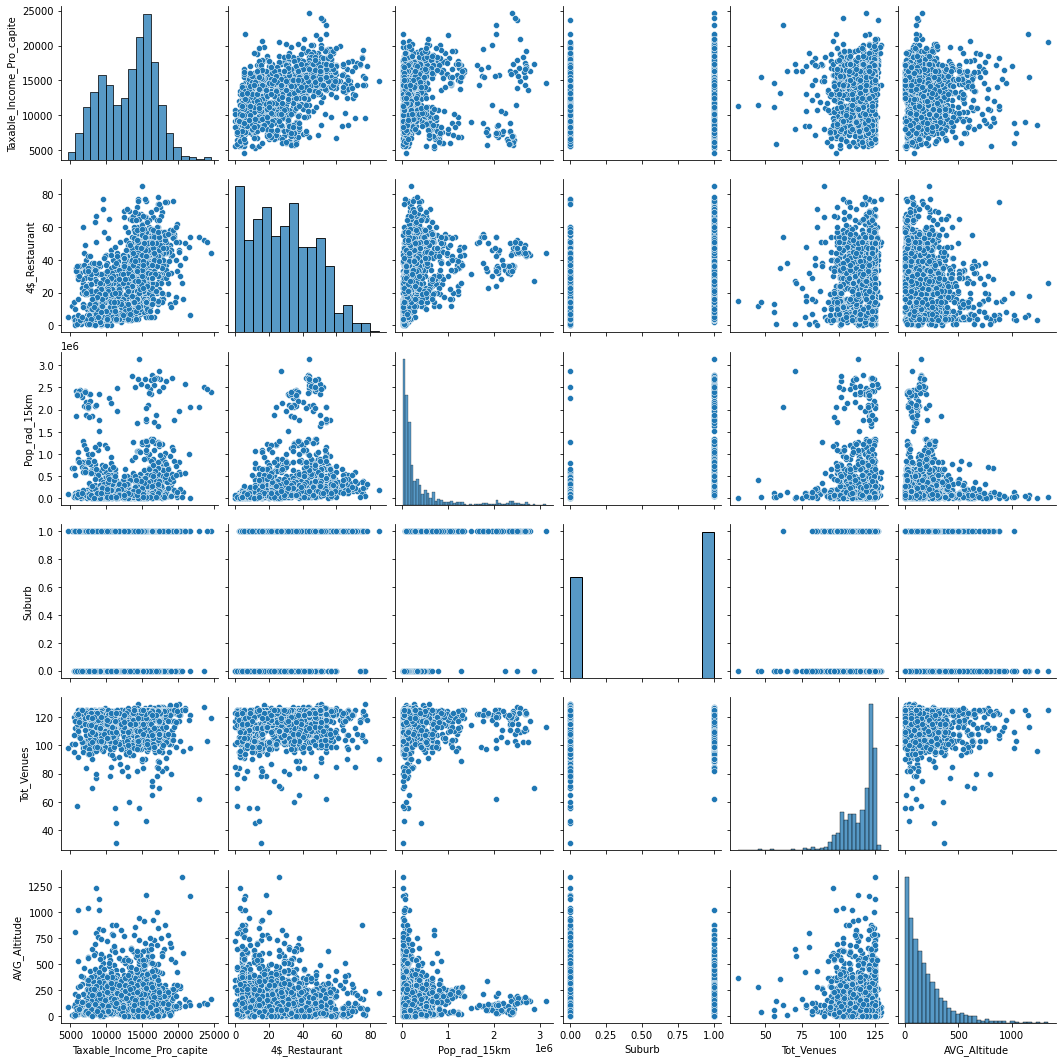

In [160]:

sns.pairplot(df[Main_Variables])

##Correlation Heat Map

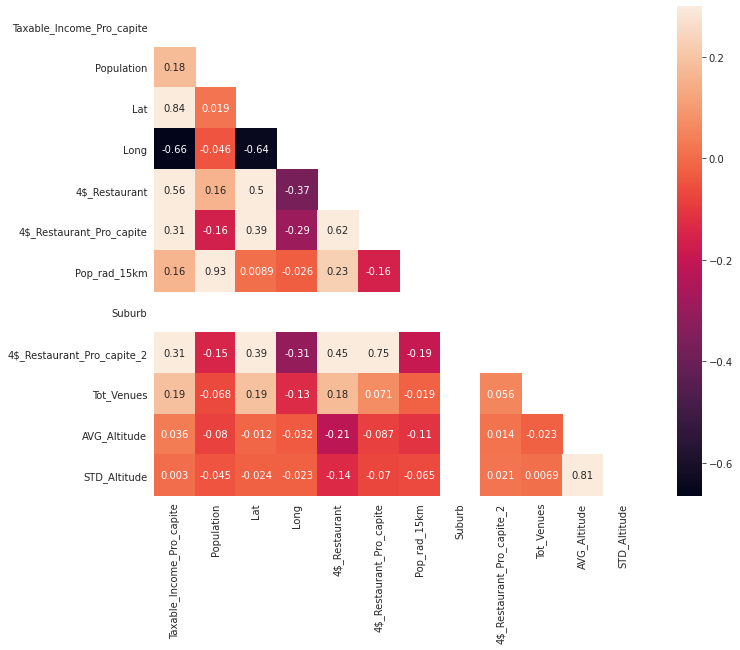

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

Main_Variables =['Taxable_Income_Pro_capite', #target variable
       'Population', 'Lat', 'Long', 
       '4$_Restaurant', #venues with price $$$ or $$$$ in a radius of 15km
       '4$_Restaurant_Pro_capite', #venues with price $$$ or $$$$ in a radius of 15km per capita by town population
       'Pop_rad_15km', #Population in a Radius of 15km
       'Suburb', #How big is the town compeard with all population in 15km radius
       '4$_Restaurant_Pro_capite_2', #venues with price $$$ or $$$$ in a radius of 15km per capita by total population in a radius of 15km
       'Tot_Venues', #tot Venues in a radius of 15km
       'AVG_Altitude',#Average e std Altitude of the town
        'STD_Altitude'] 

corr = df[df['Suburb']==0][Main_Variables].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True)

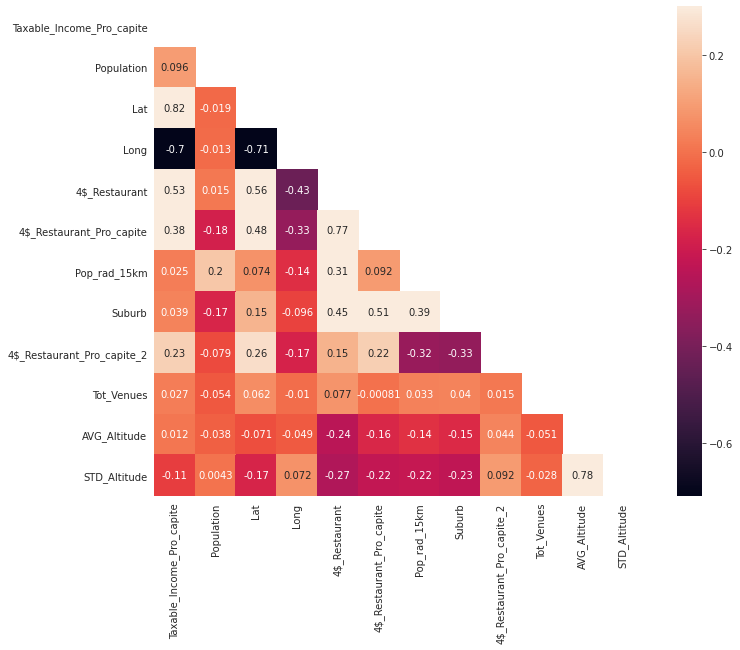

In [178]:
corr = df[Main_Variables].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True)

##Income vs Latitude

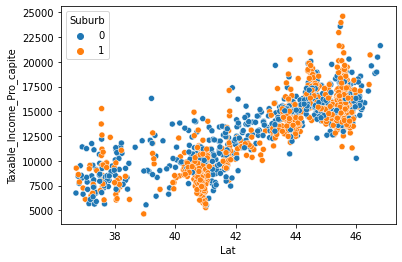

In [169]:
sns.scatterplot(x=df['Lat'],y=df['Taxable_Income_Pro_capite'],hue=df['Suburb'])

##Income Distribution

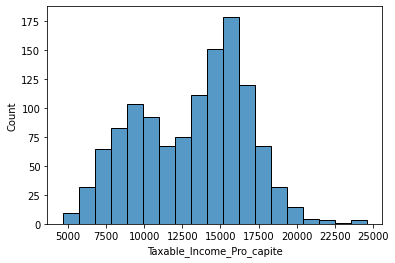

In [163]:
sns.histplot(df['Taxable_Income_Pro_capite'])

##Population Distribution

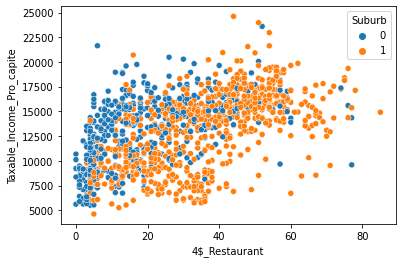

In [172]:
sns.scatterplot(x=df['4$_Restaurant'],y=df['Taxable_Income_Pro_capite'],hue=df['Suburb'])

##**MAP** by Poupulation and Income

In [143]:
import folium
import folium.plugins
import branca
import branca.colormap as cm
import math



latitude = df.loc['Roma']['Lat']
longitude = df.loc['Roma']['Long']
map_Italy = folium.Map(location=[latitude, longitude], zoom_start=6)

min_income = df['Taxable_Income_Pro_capite'].min()
max_income = df['Taxable_Income_Pro_capite'].max()

colormap = cm.LinearColormap(colors=['red','green'], index=[min_income,max_income],vmin=min_income,vmax=max_income)


# add markers to map
for lat, lng, town, prov , income , pop in zip(df['Lat'], df['Long'], df['Town'], df['Prov'],df['Taxable_Income_Pro_capite'],df['Population']):
    label = '{}, {}, Pop: {}'.format(town, prov, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= pop/30000,
        popup=label,
        color=colormap(income),
        color_opacity= 0.1,
        fill=True,
        fill_color=colormap(income),
        fill_opacity=0.7,
        parse_html=False).add_to(map_Italy)  

map_Italy

##Map Italy by total Expensive Venues on FOURSQUARE



In [188]:
import folium
import folium.plugins
import branca
import branca.colormap as cm



latitude = df.loc['Roma']['Lat']
longitude = df.loc['Roma']['Long']
map_Italy = folium.Map(location=[latitude, longitude], zoom_start=6)

min_income = df['Taxable_Income_Pro_capite'].min()
max_income = df['Taxable_Income_Pro_capite'].max()

colormap = cm.LinearColormap(colors=['red','green'], index=[min_income,max_income],vmin=min_income,vmax=max_income)


# add markers to map
for lat, lng, town, prov , income , venues in zip(df['Lat'], df['Long'], df['Town'], df['Prov'],df['Taxable_Income_Pro_capite'],df['4$_Restaurant']):
    label = '{}, {}, Venues$$$$: {}'.format(town, prov, venues)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= max(venues/5,0.1),
        popup=label,
        color=colormap(income),
        color_opacity= 0.7,
        fill=True,
        fill_color=colormap(income),
        fill_opacity=0.7,
        parse_html=False).add_to(map_Italy)  

map_Italy

# SUPERVISED MACHINE LEARNING MODELS

**Regression**

##RANDOM FOREST Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(random_state=0 )
y=df['Taxable_Income_Pro_capite']
X = df[['Lat','Long']]
cv_scores = cross_val_score(rf, X, y,cv=10)
print('Only Lat and Lng - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


rf = RandomForestRegressor(random_state=0)
X = df[['Population','Lat','Long','4$_Restaurant','4$_Restaurant_Pro_capite','Pop_rad_15km','Tot_Venues','AVG_Altitude',
        'STD_Altitude','4$_Restaurant_Pro_capite_2']]
cv_scores = cross_val_score(rf, X, y,cv=10)
print('All Macro Variables - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


rf = RandomForestRegressor(random_state=0)
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(rf, X, y,cv=10)
print('All Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

rf = RandomForestRegressor(random_state=0)
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(rf, X, y,cv=10)
print('All Variables (incl. Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


Only Lat and Lng - Mean cross-validation score (10-fold): 0.807
All Macro Variables - Mean cross-validation score (10-fold): 0.819
All Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.570
All Variables (incl. Lat, Long) Mean cross-validation score (10-fold): 0.816


TOP Variables by Importance



In [185]:
X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
y=df['Taxable_Income_Pro_capite']
rf.fit(X,y)
imp =pd.Series(rf.feature_importances_,index=X.columns)

print('TOP 10 Features')
print(pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)[:10])
print('BOTTOM 10 Features')
print(pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)[-10:])

TOP 10 Features
Lat                           0.759477
Pop_rad_15km                  0.030148
Long                          0.024451
Population                    0.021595
4$_Restaurant_Pro_capite_2    0.010913
4$_Restaurant                 0.005890
4$_Restaurant_Pro_capite      0.005652
STD_Altitude                  0.005134
AVG_Altitude                  0.004701
Tot_Venues                    0.003703
dtype: float64
BOTTOM 10 Features
Corporate Amenity_V      2.631158e-06
Spanish_V                2.104772e-06
College & Education_V    2.014674e-06
Mattress Store_V         1.333529e-06
German_V                 1.063391e-06
Preschool_V              1.060408e-06
Exhibit_V                9.418938e-07
Fishing Store_V          7.838736e-07
Bagels_V                 6.261203e-07
Fabric Shop_V            2.111926e-07
dtype: float64


In [139]:

rf = RandomForestRegressor(random_state=0)
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione',],axis=1)
X = X.drop(list(imp[100:].index),axis=1)
cv_scores = cross_val_score(rf, X, y,cv=10)
print('Top 100 Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

rf = RandomForestRegressor(random_state=0)
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione',],axis=1)
X = X.drop(list(imp[300:].index),axis=1)
cv_scores = cross_val_score(rf, X, y,cv=10)
print('Top 300 Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

rf = RandomForestRegressor(random_state=0)
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione',],axis=1)
cv_scores = cross_val_score(rf, X, y,cv=10)
print('all Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


Top 100 Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.529
Top 300 Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.555
all Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.565


## K NeighborsRegressor

In [122]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score



In [123]:
scaler = MinMaxScaler()
knn = KNeighborsRegressor()

In [124]:

X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
y=df['Taxable_Income_Pro_capite']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [125]:
results=[]
for k in np.arange(1,50):
  knn = KNeighborsRegressor(n_neighbors=k)
  scores=[]
  for x in np.arange(4):

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn.fit(X_train_scaled,y_train)
    
    scores.append(knn.score(X_test_scaled,y_test))

  results.append(np.mean(scores))
  #knn.score(X_test_scaled,y_test)



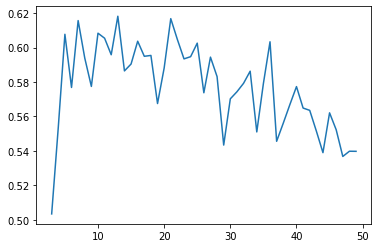

In [131]:
sns.lineplot(x=np.arange(3,50) ,y=np.array(results)[2:])

##Gradient Boosting Regressor

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)
y=df['Taxable_Income_Pro_capite']
X = df[['Lat','Long']]
cv_scores = cross_val_score(gb, X, y,cv=10)
print('Only Lat and Lng - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


gb = GradientBoostingRegressor(random_state=0)
X = df[['Population','Lat','Long','4$_Restaurant','4$_Restaurant_Pro_capite','Pop_rad_15km','Tot_Venues','AVG_Altitude',
        'STD_Altitude','4$_Restaurant_Pro_capite_2']]
cv_scores = cross_val_score(gb, X, y,cv=10)
print('All Macro Variables - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


gb = GradientBoostingRegressor(random_state=0)
X = df[['Population','4$_Restaurant','4$_Restaurant_Pro_capite','Pop_rad_15km','Tot_Venues','AVG_Altitude',
        'STD_Altitude','4$_Restaurant_Pro_capite_2']]
cv_scores = cross_val_score(gb, X, y,cv=10)
print('All Macro Variables (ex Lat, Long) - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

gb = GradientBoostingRegressor(random_state=0)
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(gb, X, y,cv=10)
print('All Variables (incl. Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

Only Lat and Lng - Mean cross-validation score (10-fold): 0.791
All Macro Variables - Mean cross-validation score (10-fold): 0.811
All Macro Variables (ex Lat, Long) - Mean cross-validation score (10-fold): 0.530
All Variables (incl. Lat, Long) Mean cross-validation score (10-fold): 0.807


In [133]:
X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
y=df['Taxable_Income_Pro_capite']
gb.fit(X,y)
imp =pd.Series(gb.feature_importances_,index=X.columns)

print('TOP 20 Features')
print(pd.Series(gb.feature_importances_,index=X.columns).sort_values(ascending=False)[:20])
#print('BOTTOM 10 Features')
#print(pd.Series(gb.feature_importances_,index=X.columns).sort_values(ascending=False)[-10:])

TOP 20 Features
Lat                           0.800385
Long                          0.046990
Pop_rad_15km                  0.030238
Population                    0.021378
4$_Restaurant                 0.009710
4$_Restaurant_Pro_capite_2    0.008997
AVG_Altitude                  0.004993
Pizza_V                       0.003676
Vegetarian / Vegan_V          0.003436
EV Charging_V                 0.003347
Gas Station_V                 0.003242
Factory_V                     0.002666
Bookstore_V                   0.002526
Juice Bar_V                   0.002504
Bus Stop_V                    0.002308
Spiritual_V                   0.001929
Men's Store_V                 0.001791
Playground_V                  0.001782
Beach_V                       0.001736
Gift Shop_V                   0.001489
dtype: float64


In [134]:
gb = GradientBoostingRegressor(random_state=0)
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(gb, X, y,cv=10)
print('All Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

gb = GradientBoostingRegressor(random_state=0)
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione',],axis=1)
X = X.drop(list(imp[100:].index),axis=1)
cv_scores = cross_val_score(gb, X, y,cv=10)
print('Top 100 Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

gb = GradientBoostingRegressor(random_state=0)
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione',],axis=1)
X = X.drop(list(imp[300:].index),axis=1)
cv_scores = cross_val_score(gb, X, y,cv=10)
print('Top 300 Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


All Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.585
Top 100 Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.537
Top 300 Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.577


## ADA Booster

In [135]:
from sklearn.ensemble import AdaBoostRegressor


ada = AdaBoostRegressor(random_state=0)
y=df['Taxable_Income_Pro_capite']
X = df[['Lat','Long']]
cv_scores = cross_val_score(gb, X, y,cv=10)
print('Only Lat and Lng - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


ada = AdaBoostRegressor(random_state=0)
X = df[['Population','Lat','Long','4$_Restaurant','4$_Restaurant_Pro_capite','Pop_rad_15km','Tot_Venues','AVG_Altitude',
        'STD_Altitude','4$_Restaurant_Pro_capite_2']]
cv_scores = cross_val_score(ada, X, y,cv=10)
print('All Macro Variables - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


ada = AdaBoostRegressor(random_state=0)
X = df[['Population','4$_Restaurant','4$_Restaurant_Pro_capite','Pop_rad_15km','Tot_Venues','AVG_Altitude',
        'STD_Altitude','4$_Restaurant_Pro_capite_2']]
cv_scores = cross_val_score(ada, X, y,cv=10)
print('All Macro Variables (ex Lat, Long) - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

ada = AdaBoostRegressor(random_state=0)
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(ada, X, y,cv=10)
print('All Variables (inc Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

Only Lat and Lng - Mean cross-validation score (10-fold): 0.791
All Macro Variables - Mean cross-validation score (10-fold): 0.743
All Macro Variables (ex Lat, Long) - Mean cross-validation score (10-fold): 0.407
All Variables (inc Lat, Long) Mean cross-validation score (10-fold): 0.759


In [51]:
X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
y=df['Taxable_Income_Pro_capite']
ada.fit(X,y)
imp =pd.Series(ada.feature_importances_,index=X.columns)

print('TOP 20 Features')
print(pd.Series(ada.feature_importances_,index=X.columns).sort_values(ascending=False)[:20])
#print('BOTTOM 10 Features')
#print(pd.Series(gb.feature_importances_,index=X.columns).sort_values(ascending=False)[-10:])

TOP 20 Features
Lat                           0.480872
Long                          0.150748
EV Charging_V                 0.031655
Population                    0.022179
Pop_rad_15km                  0.021384
Coworking Space_V             0.018090
Pizza_V                       0.016178
4$_Restaurant                 0.015797
4$_Restaurant_Pro_capite_2    0.013601
Spiritual_V                   0.012302
Steakhouse_V                  0.011652
AVG_Altitude                  0.010825
Government_V                  0.010740
Sporting Goods_V              0.009958
Vegetarian / Vegan_V          0.009425
Coffee Shop_V                 0.007650
Residential_V                 0.007409
Non-Profit_V                  0.007215
Sports Club_V                 0.007190
Harbor / Marina_V             0.006588
dtype: float64


In [52]:
ada = AdaBoostRegressor(random_state=0)
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(ada, X, y,cv=10)
print('All Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

ada = AdaBoostRegressor(random_state=0)
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione',],axis=1)
X = X.drop(list(imp[100:].index),axis=1)
cv_scores = cross_val_score(ada, X, y,cv=10)
print('Top 100 Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

ada = AdaBoostRegressor(random_state=0)
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione',],axis=1)
X = X.drop(list(imp[300:].index),axis=1)
cv_scores = cross_val_score(ada, X, y,cv=10)
print('Top 300 Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

All Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.550
Top 100 Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.525
Top 300 Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.553


##BAGGING REGRESSOR

In [63]:
from sklearn.ensemble import BaggingRegressor
hgb = BaggingRegressor()
y=df['Taxable_Income_Pro_capite']
X = df[['Lat','Long']]
cv_scores = cross_val_score(hgb, X, y,cv=10)
print('Only Lat and Lng - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

hgb = BaggingRegressor()
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(hgb, X, y,cv=10)
print('All Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

hgb = BaggingRegressor()
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(hgb, X, y,cv=10)
print('All Variables (incl. Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

Only Lat and Lng - Mean cross-validation score (10-fold): 0.807
All Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.561
All Variables (incl. Lat, Long) Mean cross-validation score (10-fold): 0.822


## XGBOOST Regressor

In [68]:
import xgboost as xgb
xgb_model  = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
y=df['Taxable_Income_Pro_capite']
X = df[['Lat','Long']]
cv_scores = cross_val_score(xgb_model, X, y,cv=10)
print('Only Lat and Lng - Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

xgb_model  = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Lat','Long','Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(xgb_model, X, y,cv=10)
print('All Variables (ex Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))

xgb_model  = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
y=df['Taxable_Income_Pro_capite']
X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
cv_scores = cross_val_score(xgb_model, X, y,cv=10)
print('All Variables (incl. Lat, Long) Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores)))


Only Lat and Lng - Mean cross-validation score (10-fold): 0.806
All Variables (ex Lat, Long) Mean cross-validation score (10-fold): 0.657
All Variables (incl. Lat, Long) Mean cross-validation score (10-fold): 0.827


In [9]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split


import xgboost as xgb

X = df.drop(['Town','Taxable Income','Taxable_Income_Pro_capite', 'Prov', 'Regione'],axis=1)
y=df['Taxable_Income_Pro_capite']

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")




xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)
report_best_scores(search.cv_results_, 1)



Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 12.2min finished


Model with rank: 1
Mean validation score: 0.819 (std: 0.035)
Parameters: {'colsample_bytree': 0.9266653415629146, 'gamma': 0.11439908274581123, 'learning_rate': 0.053093972948637894, 'max_depth': 4, 'n_estimators': 121, 'subsample': 0.9521871356061031}

